<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-algaher0805/blob/main/curso2_m%C3%B3dulo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Analysis with Python, IBM.

##Módulo 3

###Alejandro García Hernández

###A01793812


En el módulo 3 se introduce el concepto de **Análisis exploratorio de datos**,  el cuál se refiere al análisis de datos con la finalidad de:

- resumir las principales características de los datos 
- obtener una mejor comprensión del conjunto de datos
- descubrir relaciones entre diferentes variables
- extraer variables importantes para el problema que estamos tratando de resolver

## Estadísticas descriptivas
Antes de invertir tiempo intentando encontrar el modelo perfecto para resolver algún problema es importante realizar un análisis de los datos. Una manera fácil de hacerlo es calcular algunos estadísticas descriptivas. El análisis estadístico descriptivo ayuda, como su nombre lo indica, a describir las características básicas de un conjunto de datos.

In [39]:
#librerias necesarias
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from scipy import stats

In [6]:
#se obtienen los datos y mostramos los primeros 5 registros
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [8]:
#siempre es útil ver que tipo de datos contiene cada variable para que, en caso de que no sea correcto como se importaron los datos se corrijan
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [10]:
# describe nos da un pequeño pero muy útil resumen de la distribución de los datos (mínimo, máximo, cuartiles, media, desviación, # de registros)
#podemos observar que las variables no númericas fueron omitidas de este análisis
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [12]:
#Como describe omite el análisis para las variables categoricas, podemos usar value_counts() para obtener una descripción sencilla de estas
df['drive-wheels'].value_counts()
#En este ejemplo podemos ver las diferentes categorias contenidas en la variable drive-wheels.

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

Si bien las tablas anteriores nos dan información valiosa acerca de nuestros datos, mostrar esta información de manera visual siempre ayuda a un entendimiento rápido y fácil de los datos.

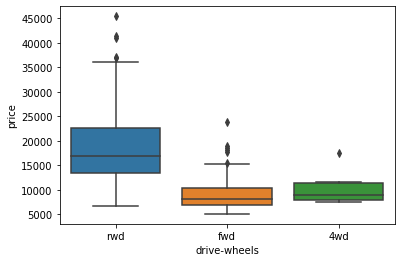

In [15]:
#En este boxplot nos muestra los cuartiles y outliers, de la variable precio vistos desde cada categoría contenida en la variable drive-wheels
sns.boxplot(x="drive-wheels", y="price",data=df)

Otro paso importante para entender nuestros datos es la relación que puede existir entre dos variables, una manera visual de encontrar y/o entender estas relaciones es usando diagramas de dispersión (scatter plots). En un diagrama de dispersión, generalmente establecemos la variable predictora en el eje x y establecemos la variable de destino en el eje y.

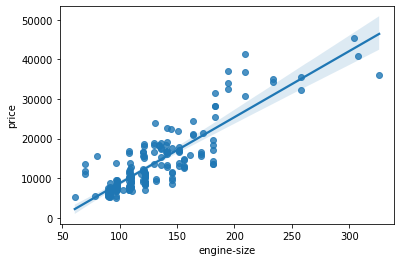

In [19]:
#Para las variables numericas el scatter plot nos muestra la relación entre dos variables, en este caso, el tamaño del motor y el precio. 
sns.regplot(x="engine-size", y = "price", data=df)

#se observa que entre más grande sea el tamaño del motor más caro es el automóvil

Otro punto importante es que a veces estamos interesados en analizar la relación entre una variable categorica a nuestra variable objetivo, para ello, primero es necesario transformar nuestros datos mediante una agrupación.

In [23]:
#En el siguiente ejemplo se utiliza groupby para mostrar el precio promedio para cada combinación de las variables drive-wheels y body-style
df_1 = df[['drive-wheels','body-style','price']]
agrupado = df_1.groupby(['drive-wheels','body-style'],as_index=False).mean()
agrupado

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [24]:
#Aunque la tabla anterior muestra la información solicitada, el formato no es muy amigable por lo que podemos usar la función pivot
agrupado2 = agrupado.pivot(index='drive-wheels',columns='body-style')
agrupado2

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Otro punto importante que se trata en este tercer módulo es el análisis de la  varianza. Para analizar variables categóricas, podemos usar el método ANOVA.
ANOVA es una prueba estadística que significa "Análisis de varianza". ANOVA se puede utilizar para encontrar la correlación entre diferentes grupos de una variable categórica. La prueba ANOVA devuelve dos valores: el resultado de la prueba F y el valor p.
- La prueba F calcula la relación de variación entre la media de los grupos sobre la variación dentro de cada uno de los grupos de muestra.
- El valor p muestra si el resultado obtenido es estadísticamente significativo.


In [48]:
#Para realizar el análisis primero agrupamos los datos por la variable drive-wheels
df_2=df_1[['drive-wheels', 'price']].groupby(['drive-wheels'])
df_2.head()

#y utilizamos f_oneway de stats para obtener el análisis
f_val, p_val = stats.f_oneway(df_2.get_group('fwd')['price'], df_2.get_group('rwd')['price'])  
 
print( "ANOVA: F=", round(f_val,4), ", P =", round(p_val,16))   

#los resultados muestran un valor alto de F y un valor de casi 0 para P por lo que se infiere una correlación fuerte entre las variables.

ANOVA: F= 130.5533 , P = 0.0


Finalmente, en el módulo se habla de la correlación entre variables. La correlación nos muestra el efecto que tiene sobre una variable el cambio de otra variable en el tiempo. Es importante tener en cuenta que la correlación no implica causalidad, por ejemplo, seguramente el uso de sombrillas se incrementará a medida que las lluvias aumentan , pero no tenemos suficiente información para decir por ejemplo si el uso de sombrillas causan lluvia. 


- Correlación de Pearson. Este médoto nos arroja dos valores, el coeficiente de correlación y el p-value. 
  - Si el valor del coeficiente es cercano a 1, se dice q las variables tienen una fuerte correlación positiva y de manera análoga, un valor cercano a -1 implica una fuerte correlación negativa mientras que valores cercanos a 0 indican que no existe correlación entre las variables.
  - Por otro lado un p-value menor que 0.001 nos indica una gran certeza sobre el resultado; valores entre 0.001 y 0.05 nos indican una certeza moderada; valores menores entre 0.05 y 0.1 nos dan una certeza débil y finalmente valores mayores a 0.1 nos indican que los resultados no son confiables.

In [49]:
#Con la libreria stats calculamos el coeficiente de correlación de Pearson.
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("El coeficiente de correlación de Pearson es", round(pearson_coef,4), " con un P-value de P =", round(p_value,16))  
#aunque el resultado es confiable, se observa una correlación positiva moderada entre wheel-base y price

El coeficiente de correlación de Pearson es 0.5846  con un P-value de P = 0.0


In [50]:
#Con la libreria stats calculamos el coeficiente de correlación de Pearson.
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("El coeficiente de correlación de Pearson es", round(pearson_coef,4), " con un P-value de P =", round(p_value,16))  
#En cambio, la correlación entre los caballos de fuerza y el precio es alta y el resultado es confiable.

El coeficiente de correlación de Pearson es 0.8096  con un P-value de P = 0.0


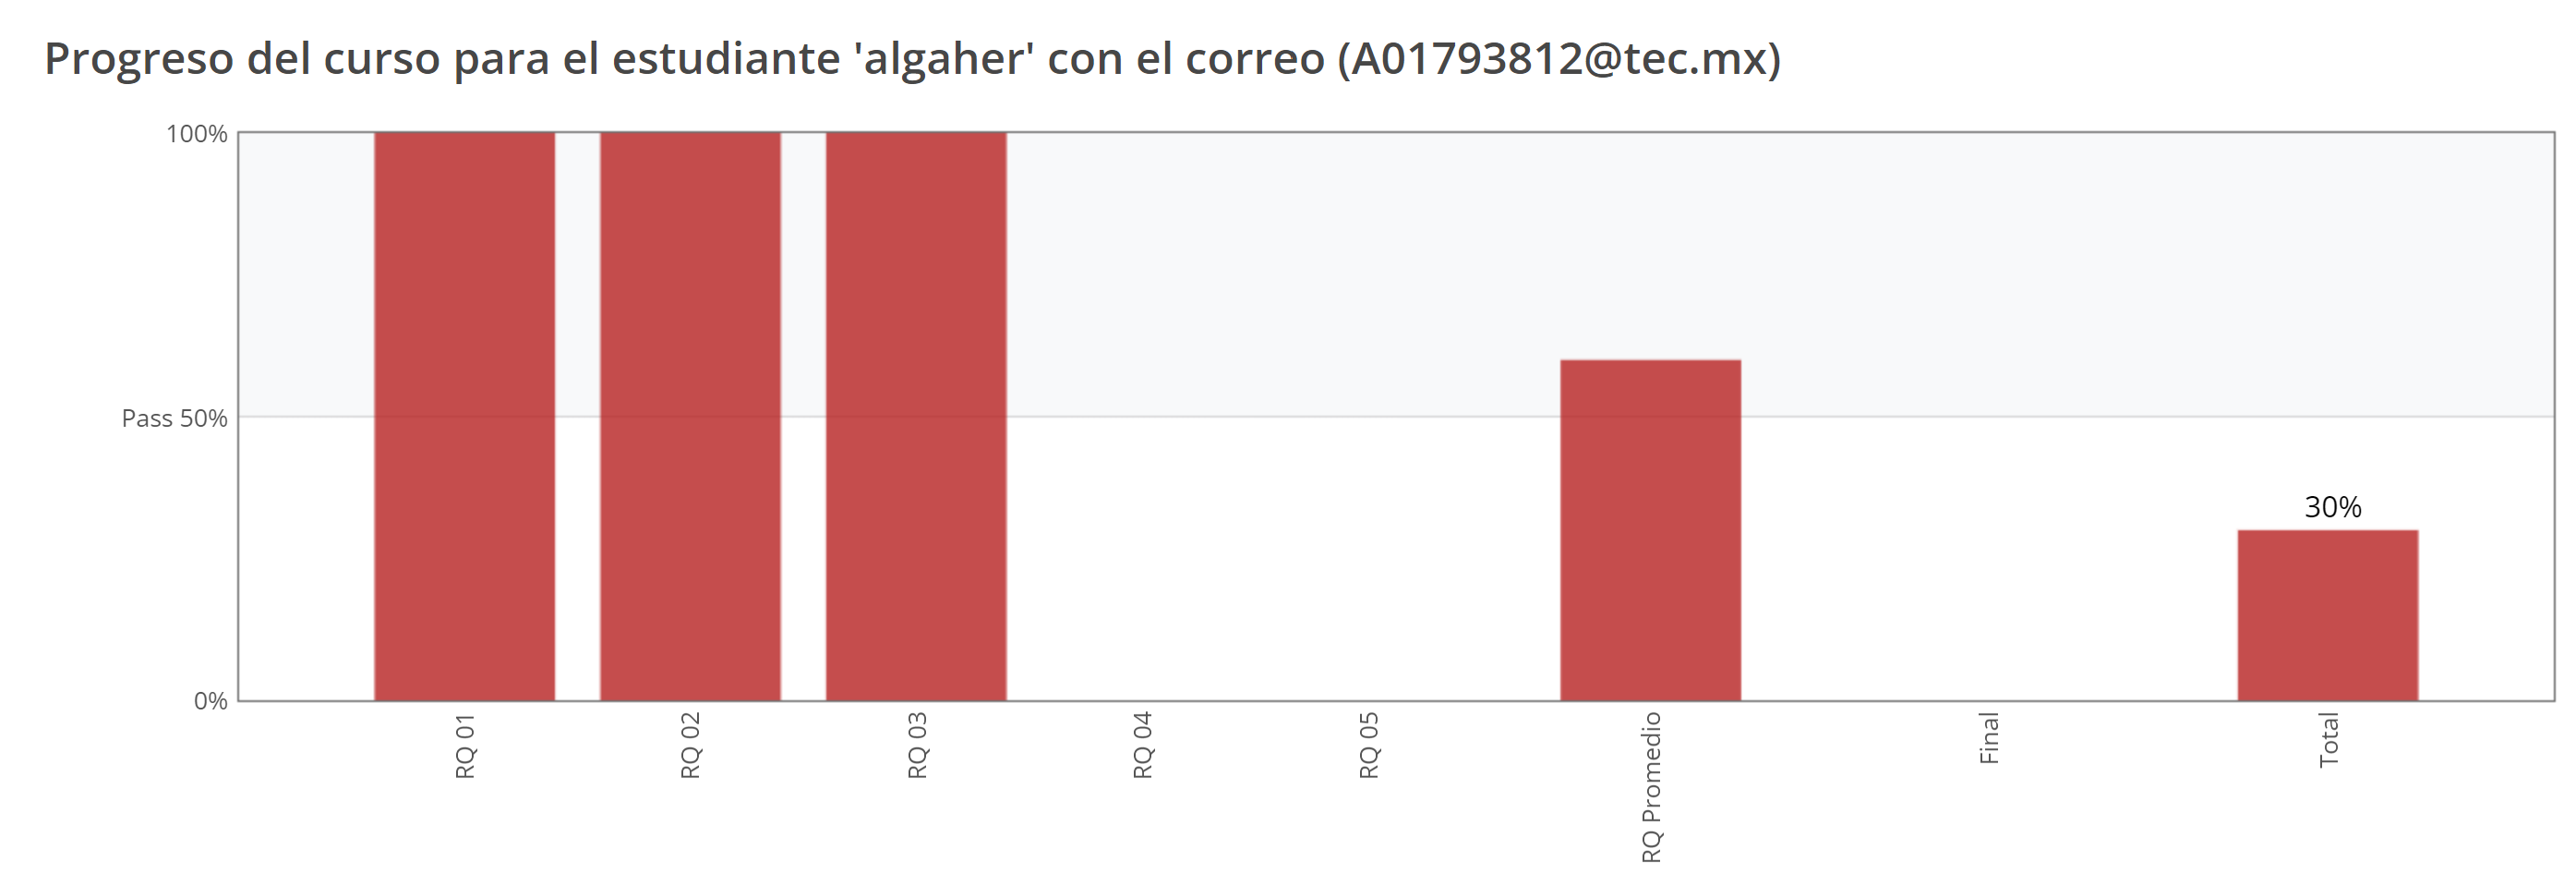